# ***student_lifestyle_dataset***

In [1]:
# Import the desk
from google.colab import files
import pandas as pd # Import the pandas library and assign it the alias 'pd'

uploaded = files.upload()  # Sube el archivo CSV desde tu computadora

# Cargar el archivo en un DataFrame
df = pd.read_csv(next(iter(uploaded)))
df.head()

Saving student_lifestyle_dataset.csv to student_lifestyle_dataset.csv


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [2]:
# Explorar las primeras filas del dataset
student_lifestyle_dataset = df.head()

# Resumen general del dataset
dataset_info = df.info()

# Verificar valores nulos
null_values = df.isnull().sum()

# Resumen estadístico descriptivo
dataset_describe = df.describe(include='all')

# Mostrar los resultados principales
student_lifestyle_dataset, null_values, dataset_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


(   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
 0           1                  6.9                            3.8   
 1           2                  5.3                            3.5   
 2           3                  5.1                            3.9   
 3           4                  6.5                            2.1   
 4           5                  8.1                            0.6   
 
    Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
 0                  8.7                   2.8                              1.8   
 1                  8.0                   4.2                              3.0   
 2                  9.2                   1.2                              4.6   
 3                  7.2                   1.7                              6.5   
 4                  6.5                   2.2                              6.6   
 
     GPA Stress_Level  
 0  2.99     Moderate  
 1  2.75          Low  
 2  2.67    

Resultados Iniciales del EDA para el Segundo Dataset
1. Resumen del Dataset
Cantidad de Filas y Columnas: 2000 filas, 8 columnas.
Tipos de Datos:
Numéricos (int64, float64): Student_ID, Study_Hours_Per_Day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day, Physical_Activity_Hours_Per_Day, GPA.
Categórico (object): Stress_Level.
2. Valores Nulos y Duplicados
Valores Nulos: No hay valores nulos en ninguna columna.
Duplicados: La columna Student_ID parece ser un identificador único; no se esperan duplicados.
3. Estadísticas Descriptivas
Variables Numéricas:

Study_Hours_Per_Day: Varía entre 5 y 10 horas, con una media de 7.48.
Extracurricular_Hours_Per_Day: Promedio de 2 horas diarias, con un máximo de 4.
Sleep_Hours_Per_Day: Media de 7.5 horas, rango entre 5 y 10.
Physical_Activity_Hours_Per_Day: Media de 4.33 horas, con un máximo inusual de 13 horas.
GPA: Media de 3.12, rango entre 2.24 y 4.00.
Variables Categóricas:

Stress_Level: 3 categorías: "High", "Moderate", "Low", siendo "High" la más común (1029 observaciones).

Distribuciones para variables numéricas.
Relaciones entre variables clave como Stress_Level, GPA y actividades diarias.
Exploración de posibles valores atípicos, como las 13 horas de actividad física.

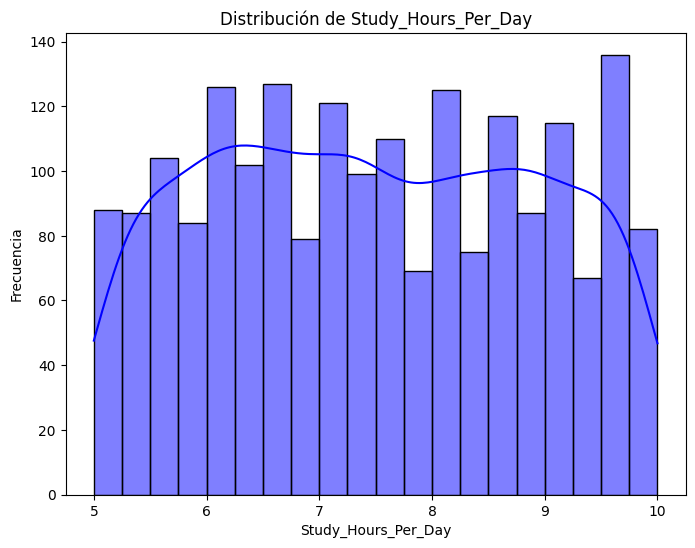

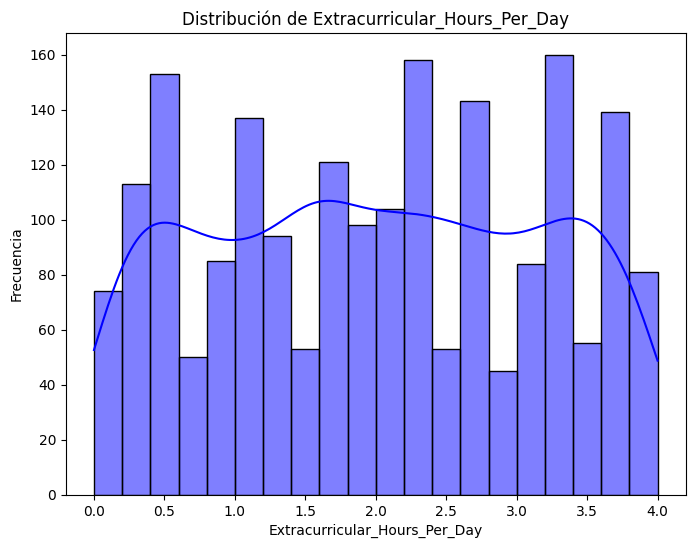

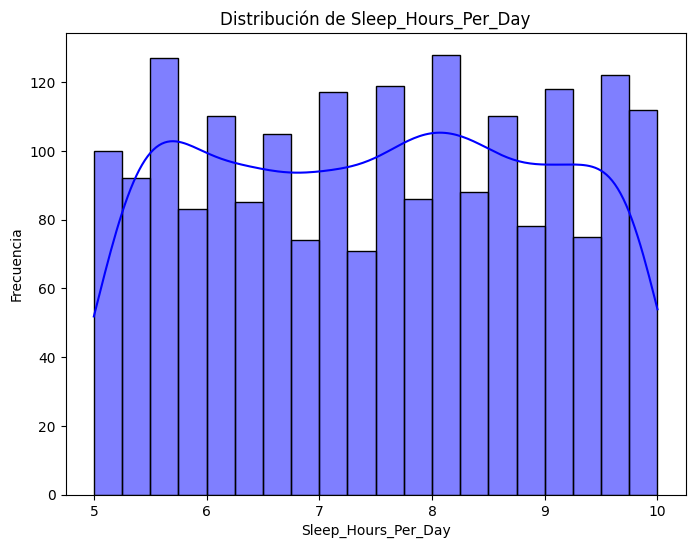

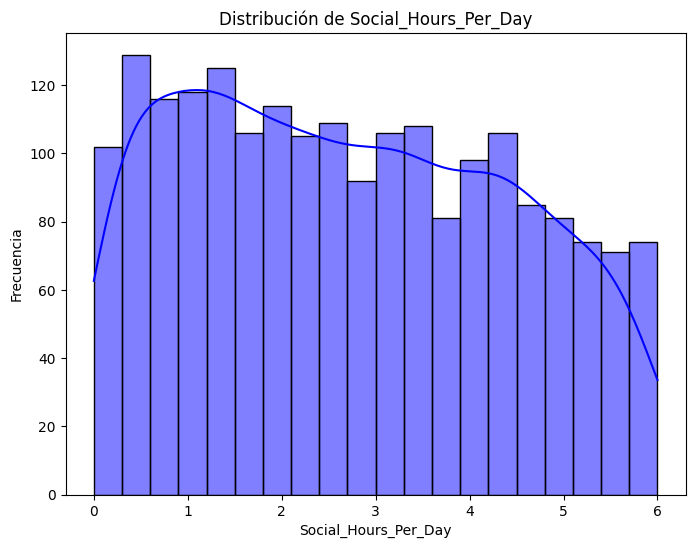

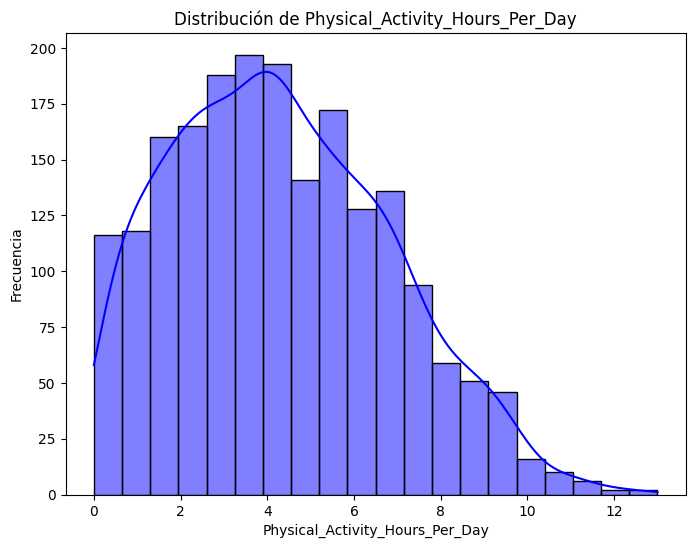

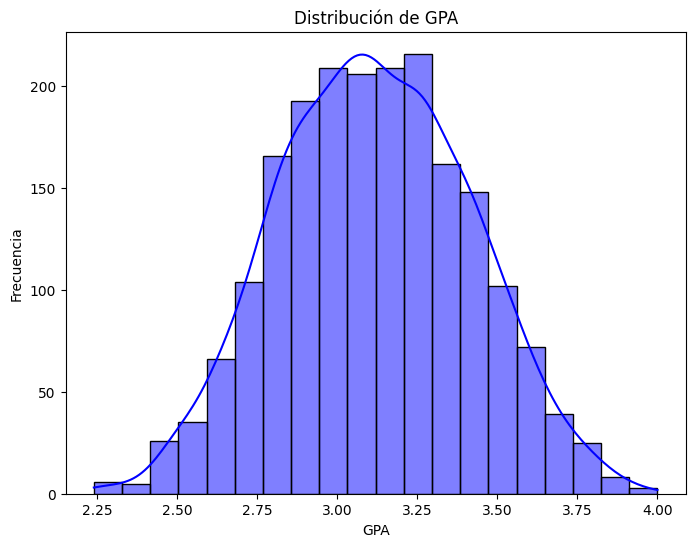

<ipython-input-3-7a06fce3378c>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stress_Level', y='GPA', data=df, palette='pastel')


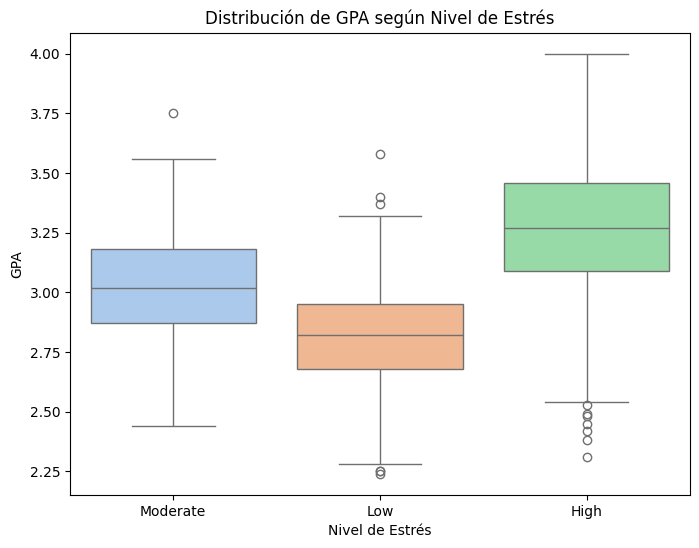

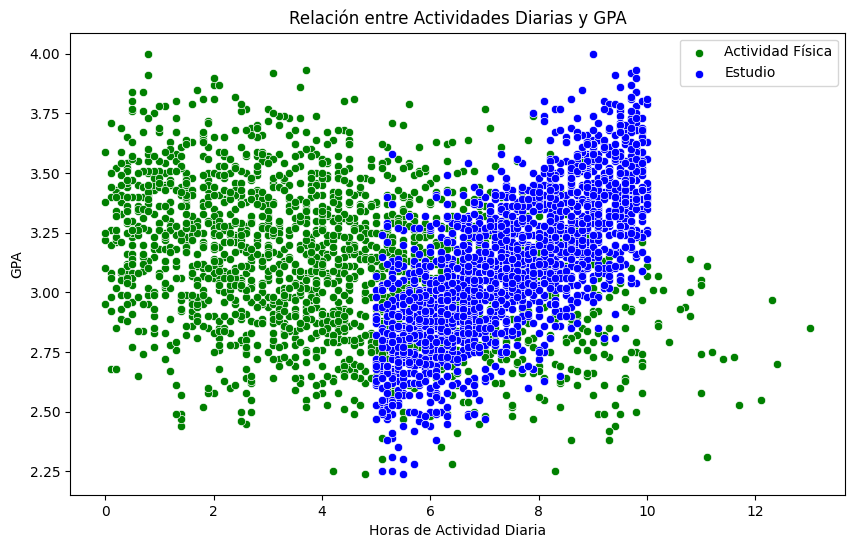

In [3]:
# 1. Distribuciones de las variables numéricas
import matplotlib.pyplot as plt # Import the necessary module
import seaborn as sns # Import the necessary module

numeric_columns = [
    'Study_Hours_Per_Day',
    'Extracurricular_Hours_Per_Day',
    'Sleep_Hours_Per_Day',
    'Social_Hours_Per_Day',
    'Physical_Activity_Hours_Per_Day',
    'GPA'
]

for col in numeric_columns:

    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20, color="blue")
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

  # 2. Relación entre Stress Level y GPA
plt.figure(figsize=(8, 6))
sns.boxplot(x='Stress_Level', y='GPA', data=df, palette='pastel')
plt.title('Distribución de GPA según Nivel de Estrés')
plt.xlabel('Nivel de Estrés')
plt.ylabel('GPA')
plt.show()

# 3. Relación entre Actividades Diarias y GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Physical_Activity_Hours_Per_Day', y='GPA', data=df, color='green', label='Actividad Física')
sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', data=df, color='blue', label='Estudio')
plt.title('Relación entre Actividades Diarias y GPA')
plt.xlabel('Horas de Actividad Diaria')
plt.ylabel('GPA')
plt.legend()
plt.show()


Visualizaciones y Hallazgos Clave
Distribuciones de Variables Numéricas:

La mayoría de las variables (Study_Hours_Per_Day, Sleep_Hours_Per_Day, Social_Hours_Per_Day) tienen distribuciones razonables.
Physical_Activity_Hours_Per_Day: Presenta valores extremos (hasta 13 horas), lo que podría ser un dato atípico.
GPA: Tiene una distribución normal centrada alrededor de 3.1.
Relación entre Stress_Level y GPA:

Los estudiantes con niveles de estrés "Low" tienden a tener un GPA más alto, mientras que los de nivel "High" muestran un rango más bajo.
Relaciones entre Actividades Diarias y GPA:

El tiempo dedicado a actividades físicas y de estudio muestra una correlación moderada con el GPA.
Los datos confirman que el equilibrio entre estudio, actividades extracurriculares y físicas podría influir en el desempeño académico.



Dataset 2: Student Lifestyle
Características principales:

Información sobre estilo de vida estudiantil (horas de estudio, sueño, actividad física, estrés, etc.).
Variables numéricas y categóricas con distribuciones razonables, pero algunas muestran valores extremos (actividad física de hasta 13 horas).
El estrés tiene un impacto directo en el GPA, con diferencias observables en los grupos.
Problemática Elegida: Predicción

Objetivo: Predecir el GPA de los estudiantes basado en su estilo de vida.
Justificación:
Es relevante para comprender cómo diferentes aspectos del estilo de vida afectan el rendimiento académico.
El desafío radica en manejar posibles multicolinealidades y ajustar el modelo a los valores extremos presentes.

Steps for Regression Modeling:
Preparation:

Handle categorical variables, such as Stress_Level.
Normalize numerical variables if necessary.
Train-Test Split:

Divide the data into training and testing sets.
Model Selection:

Use regression models such as Linear Regression, Random Forest Regressor, and Gradient Boosting.
Evaluate using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and 𝑅2 R2   score.
Evaluation:

Compare model performance on the test set.
Visualize residuals to understand prediction errors.
Optimization:

Fine-tune the model for better accuracy and robustnes

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd  # Import pandas for DataFrame operations
from google.colab import files # Import the desk
import io # Import the io module

# Upload the file
uploaded = files.upload()

# Get the filename and file content
filename = next(iter(uploaded))
file_content = uploaded[filename]

# Read the CSV file from the uploaded content using io.BytesIO
dataset = pd.read_csv(io.BytesIO(file_content)) # Assuming your data is in a CSV file and you want to name the DataFrame 'dataset'


Saving student_lifestyle_dataset.csv to student_lifestyle_dataset (1).csv


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
# Entrenar el modelo de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42)

# Crear una variable categórica basada en el GPA
def categorize_gpa(gpa):
    if gpa >= 3.5:
        return 'Alto'
    elif gpa >= 2.5:
        return 'Medio'
    else:
        return 'Bajo'

# Aplicar la función
dataset['GPA_Category'] = dataset['GPA'].apply(categorize_gpa)

# Redefinir y como la nueva columna categórica
y = dataset['GPA_Category']

# Codificar las etiquetas de y
le_y = LabelEncoder()
y = le_y.fit_transform(y)  # Convertir 'Bajo', 'Medio', 'Alto' a valores 0, 1, 2



In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Convertir GPA en categorías
def categorize_gpa(gpa):
    if gpa >= 3.5:
        return 'Alto'
    elif gpa >= 2.5:
        return 'Medio'
    else:
        return 'Bajo'

dataset['GPA_Category'] = dataset['GPA'].apply(categorize_gpa)

# Redefinir X y y
x = dataset.drop(['GPA', 'GPA_Category'], axis=1)
y = dataset['GPA_Category']

# Codificar variables categóricas y etiquetas de y
le = LabelEncoder()
y = le.fit_transform(y)  # Transformar categorías en valores numéricos
for col in x.select_dtypes(include=['object']).columns:
    x[col] = le.fit_transform(x[col])

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Predicciones
y_pred_tree = decision_tree.predict(X_test_scaled)
y_pred_proba_tree = decision_tree.predict_proba(X_test_scaled)

# Evaluar
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree, target_names=le.classes_)

# Calcular Curvas ROC y AUC
fpr_tree = {}
tpr_tree = {}
roc_auc_tree = {}
for i in range(3):  # Tres clases
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test == i, y_pred_proba_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

# Mostrar resultados
print("Matriz de Confusión:\n", conf_matrix_tree)
print("\nInforme de Clasificación:\n", classification_rep_tree)
print("\nAUC por Clase:\n", roc_auc_tree)


Matriz de Confusión:
 [[  8   0  36]
 [  0   0   7]
 [ 31  12 306]]

Informe de Clasificación:
               precision    recall  f1-score   support

        High       0.21      0.18      0.19        44
         Low       0.00      0.00      0.00         7
    Moderate       0.88      0.88      0.88       349

    accuracy                           0.79       400
   macro avg       0.36      0.35      0.36       400
weighted avg       0.79      0.79      0.79       400


AUC por Clase:
 {0: 0.5473697650663942, 1: 0.4847328244274809, 2: 0.516826788021799}


In [37]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)


In [38]:
decision_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced')


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train_balanced, y_train_balanced)

best_model = grid_search.best_estimator_


Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
random_forest.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [41]:
from sklearn.metrics import classification_report

# Evaluar el modelo
y_pred_optimized = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_optimized, target_names=['Bajo', 'Medio', 'Alto']))


              precision    recall  f1-score   support

        Bajo       0.33      0.45      0.38        44
       Medio       0.04      0.14      0.07         7
        Alto       0.91      0.82      0.86       349

    accuracy                           0.77       400
   macro avg       0.43      0.47      0.44       400
weighted avg       0.83      0.77      0.80       400



Validación cruzada

In [42]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_balanced, y_train_balanced, cv=5, scoring='f1_weighted')
print("F1-Score Weighted Promedio (Validación Cruzada):", cv_scores.mean())


F1-Score Weighted Promedio (Validación Cruzada): 0.900175045803218


Interpretación

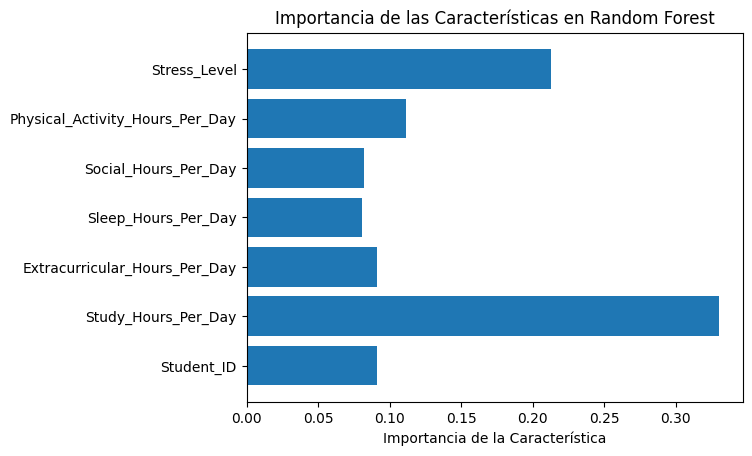

In [43]:
import matplotlib.pyplot as plt

importances = random_forest.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.xlabel("Importancia de la Característica")
plt.title("Importancia de las Características en Random Forest")
plt.show()
